# Final Project Submission
## Please fill out:

* Student name: Nastaran Nazemian
* Student pace: part time
* Scheduled project review date/time: 28/4/2020 1:30PM (PS)
* Instructor name: Eli Thomas
* Blog post URL:?????????????

In [ ]:
import re
import numpy as np
import pandas as pd
import math
import json
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('clean_data.csv', index_col=0) 
# len(df['Genre'][0])
#my_data = open("data200.json", "r")
#data = pd.read_json (r'C:\Flatiron\course-material\ModuleOneFinalProject\dsc-mod-1-project-v2-1-onl01-dtsc-pt-030220\data_0423_0749PM_30pages_2010_2020.json')
# df = df = pd.DataFrame(data)
my_data = open("clean1_data.json", "r")
data = data = pd.read_json(r'C:\Flatiron\course-material\ModuleOneFinalProject\dsc-mod-1-project-v2-1-onl01-dtsc-pt-030220\clean1_data.json')
df = pd.DataFrame(data)

In [3]:
df['Foreign_Gross'] = df['Cumulative Worldwide Gross'] - df['Gross USA']
df['Global_Revenue'] = df['Cumulative Worldwide Gross'] - df['Budget']
df['US_Revenue'] = df['Gross USA'] - df['Budget']
df['Foreign_Revenue'] = df['Foreign_Gross'] - df['Budget']
df['Global_Revenue_Expense_Ratio'] = df['Global_Revenue'] / df['Budget']
df['US_Revenue_Expense_Ratio'] = df['US_Revenue'] / df['Budget']
df['Foreign_Revenue_Expense_Ratio'] = df['Foreign_Gross']/  df['Budget']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1499
Data columns (total 26 columns):
Title_id                         1234 non-null object
Budget                           1234 non-null float64
Gross USA                        1234 non-null int64
Cumulative Worldwide Gross       1234 non-null int64
Opening Weekend USA              1221 non-null float64
Title                            1234 non-null object
Year                             1234 non-null int64
Popularity                       1234 non-null int64
Genre                            1234 non-null object
Runtime_min                      1234 non-null float64
Release_day                      1234 non-null object
IMDB_Rate                        1234 non-null float64
Rating_count                     1234 non-null int64
Director                         1234 non-null object
Writer                           1234 non-null object
Star                             1234 non-null object
User_Review_Number            

In [5]:
df[['Budget','Gross USA','Cumulative Worldwide Gross','Foreign_Gross']].corr()

,Budget,Gross USA,Cumulative Worldwide Gross,Foreign_Gross
Budget,1.000000,0.648894,0.729775,0.739887
Gross USA,0.648894,1.000000,0.944347,0.869605
Cumulative Worldwide Gross,0.729775,0.944347,1.000000,0.983628
Foreign_Gross,0.739887,0.869605,0.983628,1.000000


In [6]:
df.corr()

,Budget,Gross USA,Cumulative Worldwide Gross,Opening Weekend USA,Year,Popularity,Runtime_min,IMDB_Rate,Rating_count,User_Review_Number,Critical_Review_Number,Foreign_Gross,Global_Revenue,US_Revenue,Foreign_Revenue,Global_Revenue_Expense_Ratio,US_Revenue_Expense_Ratio,Foreign_Revenue_Expense_Ratio
Budget,1.000000,0.648894,0.729775,0.662559,-0.081797,-0.276779,0.284951,0.080203,0.440731,0.354845,0.393261,0.739887,0.607372,0.106617,0.537757,-0.119826,-0.208050,-0.015250
Gross USA,0.648894,1.000000,0.944347,0.925197,-0.083191,-0.383067,0.242615,0.261321,0.612246,0.493939,0.508679,0.869605,0.941172,0.825725,0.837084,0.277877,0.198329,0.312959
Cumulative Worldwide Gross,0.729775,0.944347,1.000000,0.893800,-0.068926,-0.376416,0.251336,0.238283,0.604431,0.505681,0.500756,0.983628,0.986378,0.693039,0.948479,0.246856,0.109412,0.343262
Opening Weekend USA,0.662559,0.925197,0.893800,1.000000,-0.073761,-0.320598,0.207215,0.126449,0.536110,0.453903,0.448562,0.834557,0.879103,0.716931,0.787762,0.225641,0.147074,0.267656
Year,-0.081797,-0.083191,-0.068926,-0.073761,1.000000,-0.207963,0.021146,-0.064236,-0.333412,0.134943,-0.292063,-0.057881,-0.060409,-0.048072,-0.040679,-0.029334,-0.029012,-0.025148
Popularity,-0.276779,-0.383067,-0.376416,-0.320598,-0.207963,1.000000,-0.354429,-0.365828,-0.461099,-0.499026,-0.477122,-0.355133,-0.370789,-0.295396,-0.337264,-0.184708,-0.123784,-0.215891
Runtime_min,0.284951,0.242615,0.251336,0.207215,0.021146,-0.354429,1.000000,0.377152,0.366285,0.329467,0.385840,0.244336,0.223484,0.105797,0.195224,-0.047939,-0.078235,-0.010986
IMDB_Rate,0.080203,0.261321,0.238283,0.126449,-0.064236,-0.365828,0.377152,1.000000,0.500804,0.254291,0.489973,0.214495,0.257578,0.282031,0.237576,0.149847,0.107158,0.168562
Rating_count,0.440731,0.612246,0.604431,0.536110,-0.333412,-0.461099,0.366285,0.500804,1.000000,0.552973,0.764217,0.571825,0.596286,0.473337,0.544973,0.241876,0.152733,0.291856
User_Review_Number,0.354845,0.493939,0.505681,0.453903,0.134943,-0.499026,0.329467,0.254291,0.552973,1.000000,0.570293,0.488417,0.502207,0.382407,0.473894,0.244217,0.165895,0.283268


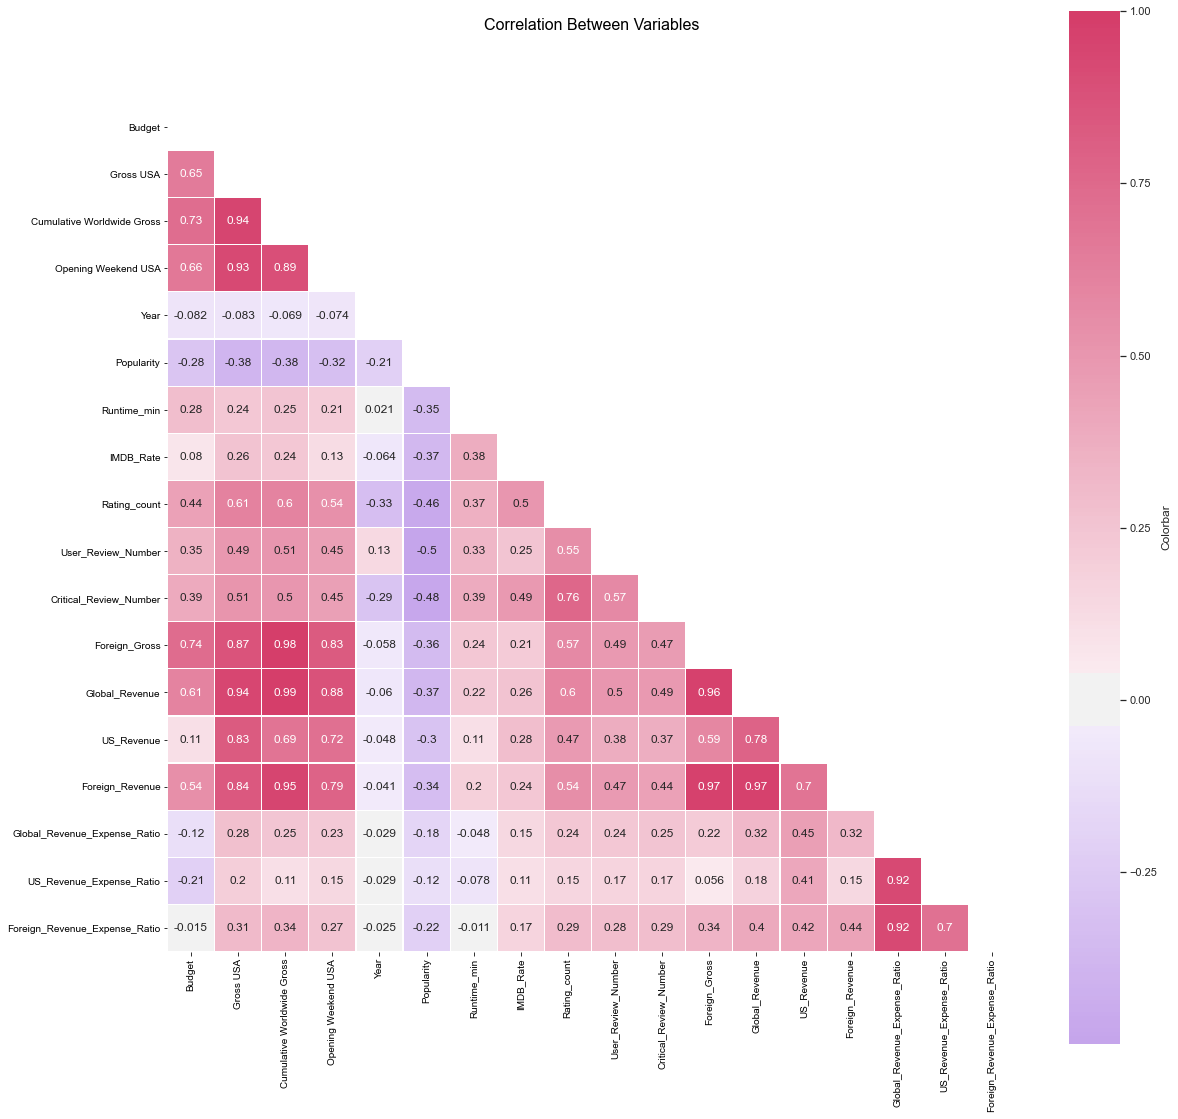

In [7]:
f, ax = plt.subplots(figsize=(19,19))
corr = df.corr()
sns.set(font_scale=1)
cmap = sns.diverging_palette(1000, 0, as_cmap=True)
matrix = np.triu(corr)
ax.set_title('Correlation Between Variables', y=1.2, fontsize=16, ha='center').set_position([0.5,1.08])
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.2, ax=ax, annot=True, mask=matrix, 
            cbar_kws={'label': 'Colorbar'})
#plt.title('Correlation Between Variables', fontsize=20, ha='center')
plt.show()

In [8]:
corr_spearman = df[['Budget','Gross USA','Cumulative Worldwide Gross','Rating_count','IMDB_Rate']].corr(method = 'spearman')
corr_spearman

,Budget,Gross USA,Cumulative Worldwide Gross,Rating_count,IMDB_Rate
Budget,1.000000,0.538781,0.616397,0.389229,0.018948
Gross USA,0.538781,1.000000,0.955385,0.682839,0.211712
Cumulative Worldwide Gross,0.616397,0.955385,1.000000,0.715474,0.185292
Rating_count,0.389229,0.682839,0.715474,1.000000,0.486275
IMDB_Rate,0.018948,0.211712,0.185292,0.486275,1.000000


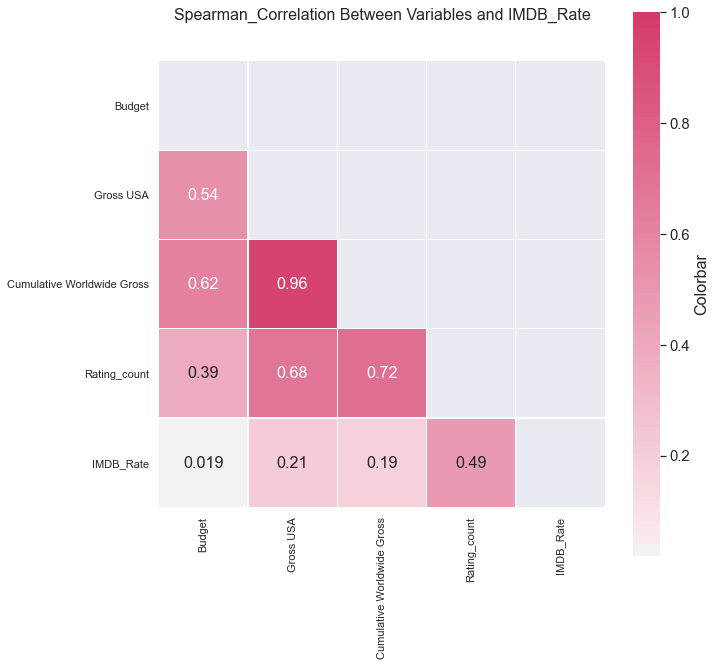

In [9]:
f, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.35)
cmap = sns.diverging_palette(1000, 0, as_cmap=True)
matrix = np.triu(corr_spearman)
ax.set_title('Spearman_Correlation Between Variables and IMDB_Rate', y=1.2, fontsize=16, ha='center').set_position([0.5,1.08])

sns.heatmap(corr_spearman, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.2, ax=ax, annot=True, mask=matrix, 
            cbar_kws={'label': 'Colorbar'})
plt.show()

In [10]:
Spearman_Corr_Profit = df[['Foreign_Gross','Global_Revenue','US_Revenue','Foreign_Revenue',
                           'Global_Revenue_Expense_Ratio', 'US_Revenue_Expense_Ratio',
                           'Foreign_Revenue_Expense_Ratio']].apply(lambda x: x.corr(df['IMDB_Rate'], method = 'spearman' ))
display(Spearman_Corr_Profit)


Foreign_Gross                    0.172493
Global_Revenue                   0.231985
US_Revenue                       0.298787
Foreign_Revenue                  0.238858
Global_Revenue_Expense_Ratio     0.248029
US_Revenue_Expense_Ratio         0.238866
Foreign_Revenue_Expense_Ratio    0.224809
dtype: float64

In [11]:
import nbimporter
import datacleaning as dc
#from datacleaning import flatten_genre
#dc.remove_outlier()
#df.head()
flatten_df = dc.flatten_genre(df)
flatten_df.head()

Importing Jupyter notebook from datacleaning.ipynb


,Title_id,Budget,Gross USA,Cumulative Worldwide Gross,Opening Weekend USA,Title,Year,Popularity,Runtime_min,Release_day,...,Critical_Review_Number,Meta_Rating,Foreign_Gross,Global_Revenue,US_Revenue,Foreign_Revenue,Global_Revenue_Expense_Ratio,US_Revenue_Expense_Ratio,Foreign_Revenue_Expense_Ratio,Genre
0,tt8367814,22000000.0,36296853,114996853,10651884.0,The Gentlemen,2019,6,113.0,01/24/2020,...,231,R,78700000,92996853.0,14296853.0,56700000.0,4.227130,0.649857,3.577273,Action
1,tt7131622,90000000.0,142502728,374343626,41082018.0,Once Upon a Time... in Hollywood,2019,8,161.0,07/26/2019,...,594,R,231840898,284343626.0,52502728.0,141840898.0,3.159374,0.583364,2.576010,Comedy
2,tt8946378,40000000.0,165363234,309232797,26769548.0,Knives Out,2019,10,131.0,11/27/2019,...,417,PG-13,143869563,269232797.0,125363234.0,103869563.0,6.730820,3.134081,3.596739,Comedy
3,tt8579674,95000000.0,159227644,368027644,576216.0,1917,2019,13,119.0,01/10/2020,...,447,R,208800000,273027644.0,64227644.0,113800000.0,2.873975,0.676080,2.197895,Drama
4,tt1598778,60000000.0,75658097,136515867,22403596.0,Contagion,2011,15,106.0,09/09/2011,...,255,PG-13,60857770,76515867.0,15658097.0,857770.0,1.275264,0.260968,1.014296,Action


In [12]:
popular_genres = dc.get_all_genres_count(flatten_df).sort_values(ascending=False)
popular_genres

Genre
Drama        667
Thriller     437
Comedy       424
Action       412
Adventure    338
Romance      222
Crime        214
Sci-Fi       205
Fantasy      201
Mystery      181
Horror       160
Family       142
Biography    138
Animation     76
History       67
War           46
Music         37
Sport         34
Musical       28
Western       18
Name: Genre, dtype: int64

In [13]:
Total_Popularity = sum(flatten_df['Popularity'])
popularity_perc_df = flatten_df.groupby(['Genre']).agg({'Popularity': 'sum'})
popularity_perc_df['Popularity_perc'] = round(popularity_perc_df['Popularity'] * 100 / Total_Popularity,2)
#popularity_perc_df['Popularity_perc'] = popularity_perc_df['Popularity_perc'].round(1).astype(str) + '%'
popularity_perc_df = popularity_perc_df.sort_values(by='Popularity_perc', ascending=False)
# popularity_perc_df['Genre'] = popularity_perc_df.index
popularity_perc_df = popularity_perc_df.reset_index()
top_ten_popularity_perc_df = popularity_perc_df[:10]


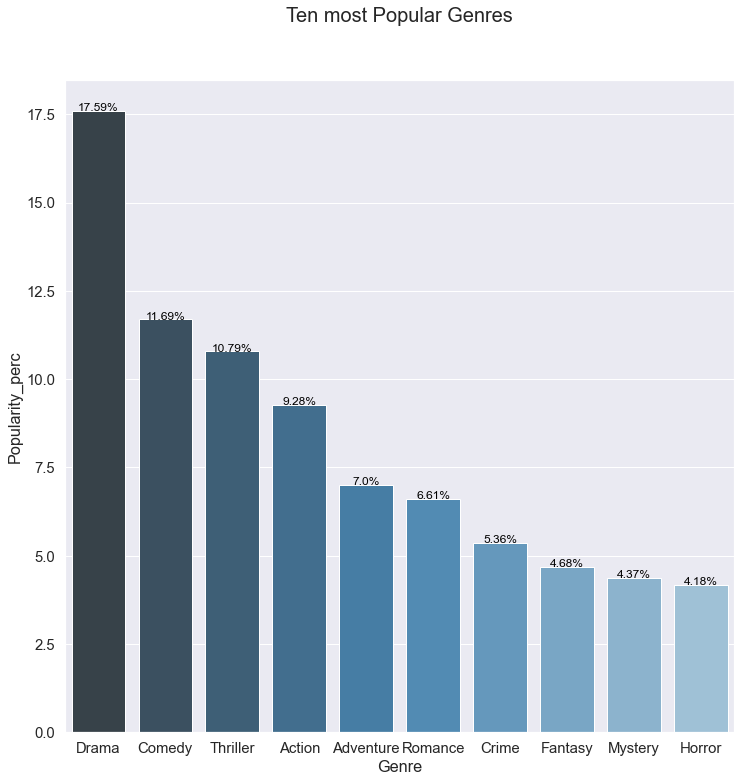

In [14]:
f, ax = plt.subplots(figsize=(12,12))
sns.set(style="whitegrid")
ax.set_title('Ten most Popular Genres', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
ax = sns.barplot(x="Genre", y="Popularity_perc", data= top_ten_popularity_perc_df, palette="Blues_d")
for index, row in top_ten_popularity_perc_df.iterrows():
    ax.text(row.name,row.Popularity_perc, str(row.Popularity_perc)+ '%', color='black', ha="center")

In [15]:
flatten_df.keys()

Index(['Title_id', 'Budget', 'Gross USA', 'Cumulative Worldwide Gross',
       'Opening Weekend USA', 'Title', 'Year', 'Popularity', 'Runtime_min',
       'Release_day', 'IMDB_Rate', 'Rating_count', 'Director', 'Writer',
       'Star', 'User_Review_Number', 'Critical_Review_Number', 'Meta_Rating',
       'Foreign_Gross', 'Global_Revenue', 'US_Revenue', 'Foreign_Revenue',
       'Global_Revenue_Expense_Ratio', 'US_Revenue_Expense_Ratio',
       'Foreign_Revenue_Expense_Ratio', 'Genre'],
      dtype='object')

In [21]:
##Return on investment 

Return_investment_df = flatten_df.groupby(['Genre']).agg({'Global_Revenue_Expense_Ratio': 'mean','US_Revenue_Expense_Ratio': 'mean' })
Return_investment_df = Return_investment_df.sort_values(by=['US_Revenue_Expense_Ratio','Global_Revenue_Expense_Ratio'], ascending=False)
Return_investment_df
Return_investment_df = Return_investment_df.reset_index()
Return_investment_df
top_five_Return_investment_df = Return_investment_df[:5]
top_five_Return_investment_df

,Genre,Global_Revenue_Expense_Ratio,US_Revenue_Expense_Ratio
0,Horror,6.110599,2.691319
1,Mystery,4.835165,1.810687
2,Music,4.131822,1.559735
3,Thriller,3.488191,1.102707
4,Musical,3.554514,0.870821


In [17]:
# Return_investment_US_df = flatten_df.groupby(['Genre']).agg({'US_Revenue_Expense_Ratio': 'mean'})
# Return_investment_US_df = Return_investment_US_df.sort_values(by='US_Revenue_Expense_Ratio', ascending=False)
# Return_investment_US_df = Return_investment_US_df.reset_index()
# Return_investment_US_df
# top_ten_USA_investment_df = Return_investment_US_df[:11]
# top_ten_USA_investment_df

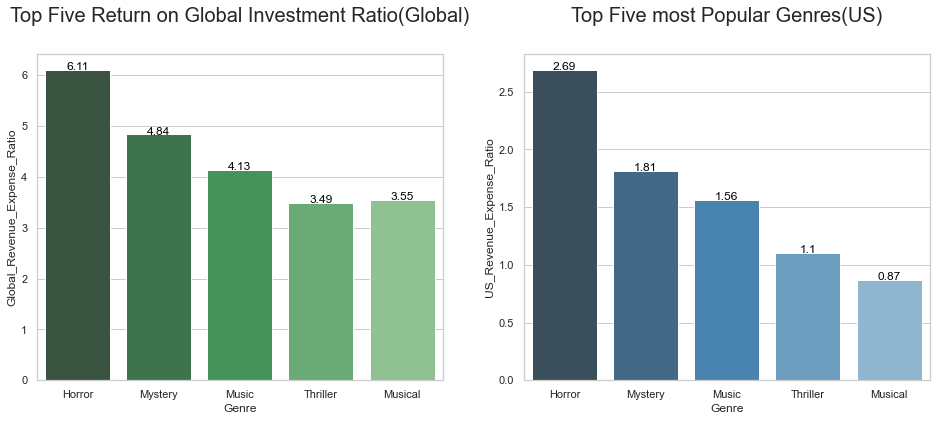

In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set(style="whitegrid")



sns.barplot(x="Genre", y="Global_Revenue_Expense_Ratio", data= top_five_Return_investment_df , palette="Greens_d", ax=ax1)
ax1.set_title('Top Five Return on Global Investment Ratio(Global)', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
for index, row in top_five_Return_investment_df.iterrows():
    ax1.text(row.name,row.Global_Revenue_Expense_Ratio, round(row.Global_Revenue_Expense_Ratio,2), color='black', ha="center")

    
    
sns.barplot(x="Genre", y="US_Revenue_Expense_Ratio", data= top_five_Return_investment_df, palette="Blues_d", ax=ax2)
ax2.set_title('Top Five most Popular Genres(US)', y=1.2, fontsize=20, ha='center').set_position([0.5,1.08])
for index, row in top_five_Return_investment_df.iterrows():
    ax2.text(row.name,row.US_Revenue_Expense_Ratio, round(row.US_Revenue_Expense_Ratio,2), color='black', ha="center") 

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# x1 = [1, 2, 3, 4, 5]
# x2 = [1, 2, 3, 4, 5]
# y1 = [1, 8, 27, 36, 125]
# y2 = [1, 4, 9, 16, 25]

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
# axes[0].plot(x1, y1)
# axes[1].plot(x2, y2)
# fig.tight_layout()
# plt.show()

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))


# plt.figure(figsize = (16, 12))
# ax = plt.subplot(1,2,1)
# sns.relplot(x="total_bill", y="tip", data=tips, ax= ax);
# ax = plt.subplot(1,2,2)
# sns.scatterplot(x="total_bill", y="tip", data=tips, ax= ax);


In [ ]:
import nbimporter
# import datacleaning as dc
from datacleaning import flatten_genre

#dc.remove_outlier()
df.head()
# data_df = flatten_genre(df)
# data_df.head()

In [ ]:
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))